<a href="https://colab.research.google.com/github/swilsonmfc/deeplearning/blob/master/IMDBKeras1DConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB Dataset & 1D Convnet

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras import Sequential
from keras import layers 
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.optimizers import RMSprop
from keras.optimizers import Adam

Using TensorFlow backend.


# Data
* Load IMDB Data
* Pad sequences

In [2]:
MAX_FEATURES = 10000
MAX_LENGTH   = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)

X_train = sequence.pad_sequences(X_train, MAX_LENGTH)
X_test  = sequence.pad_sequences(X_test,  MAX_LENGTH)

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
print('Training : ', X_train.shape, y_train.shape)
print('Test     : ', X_test.shape, y_test.shape)

Training :  (25000, 500) (25000,)
Test     :  (25000, 500) (25000,)


# Model

In [4]:
model = Sequential()
model.add(layers.Embedding(MAX_FEATURES, 128, input_length=MAX_LENGTH))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
________________________________________

# Compile & Fit

In [5]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 16s 776us/step - loss: 0.7449 - acc: 0.5218 - val_loss: 0.6841 - val_acc: 0.5608
Epoch 2/10
20000/20000 [==============================] - 1s 72us/step - loss: 0.6675 - acc: 0.6546 - val_loss: 0.6619 - val_acc: 0.6492
Epoch 3/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.6223 - acc: 0.7409 - val_loss: 0.6087 - val_acc: 0.6890
Epoch 4/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.5253 - acc: 0.7977 - val_loss: 0.4830 - val_acc: 0.7978
Epoch 5/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.4065 - acc: 0.8461 - val_loss: 0.4423 - val_acc: 0.8306
Epoch 6/10
20000/20000 [==============================] - 1s 72us/step - loss: 0.3446 - acc: 0.8676 - val_loss: 0.3957 - val_acc: 0.8454
Epoch 7/10
20000/20000 

# Accuracy

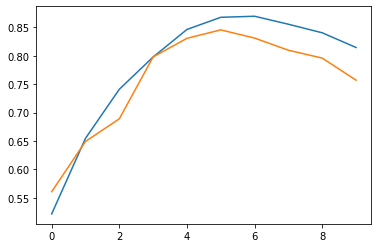

In [6]:
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')

# Loss

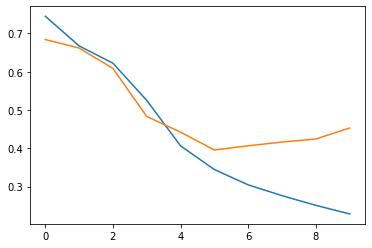

In [7]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')